The objective of this notebook is to compare the networks' topologies to find common players and/or common interaction among the different subgroups of Medulloblastoma.

During the process of activity flow inference, genes in common with all the subgroups have been included. So those genes of course will pop out during the analysis...

In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd
from neko._methods.compare import compare_networks
from yfiles_jupyter_graphs import GraphWidget

In [2]:
data_folder = "../data/"

figures_folder = "../Figures/"

sif_output = "../sif_files/"

importing resources:

In [3]:
resources_signor = Resources()
resources_signor.import_signor_tsv(data_folder + "signor_db.tsv")

In [4]:
omnipath = op.interactions.OmniPath().get()

importing the WNT networks inferred from signor and omnipath

In [5]:
sif_signor = sif_output + "WNT/WNT_signor.sif"
WNT_signor = Network(sif_file=sif_signor, resources=resources_signor)

sif_omnipath = sif_output + "WNT/WNT_omnipath.sif"
WNT_omnipath = Network(sif_file=sif_omnipath, resources=omnipath)

# First we compare the nodes found in Signor and Omnipath

In [6]:
interaction_comparison, node_comparison = compare_networks(WNT_signor, WNT_omnipath)
print(interaction_comparison)
print(node_comparison)

     source  target           comparison
0    ADAM17  NOTCH1  Unique to Network 2
1    ADAM17   PTPRF  Unique to Network 2
2    ADAM17    TGFA  Unique to Network 2
3      AKT1      AR  Unique to Network 1
4      AKT1    CDK2  Unique to Network 1
..      ...     ...                  ...
619    YAP1   RUNX2  Unique to Network 1
620  ZDHHC5    EZH2  Unique to Network 1
621    ZEB1    CDH1  Unique to Network 1
622    ZIC1    GLI1               Common
623    ZIC1    GLI3  Unique to Network 1

[624 rows x 3 columns]
           node           comparison
0          EMX2  Unique to Network 1
1    SIGNOR-PF1  Unique to Network 1
2          SOX4  Unique to Network 1
3        CSNK1E  Unique to Network 1
4         PITX2  Unique to Network 1
..          ...                  ...
145      MAPK14               Common
146       SMAD2               Common
147       MYOD1               Common
148        GLI1               Common
149          AR               Common

[150 rows x 2 columns]


In [12]:
common_nodes = node_comparison[node_comparison["comparison"] == "Common"]["node"].values

In [10]:
common_nodes

['MYC' 'LHX2' 'LEF1' 'TP53' 'DLX2' 'CDKN1A' 'CTNNB1' 'RUNX2' 'NKD1' 'SP1'
 'MSX1' 'TGFA' 'PAX3' 'MSX2' 'CSNK2B' 'NKD2' 'CREBBP' 'GSK3A' 'DVL3'
 'WWTR1' 'SMAD3' 'DDX3X' 'DLX5' 'ZIC1' 'GSK3B' 'SIRT1' 'CDK2' 'SMARCA4'
 'MAF' 'CDK1' 'EGFR' 'FRAT1' 'MAPK14' 'SMAD2' 'MYOD1' 'GLI1' 'AR'] 37


In [27]:
signor_nodes = WNT_signor.nodes["Genesymbol"].values
len(signor_nodes)

93

In [34]:
omnipath_nodes = WNT_omnipath.nodes["Genesymbol"].values
len(omnipath_nodes)

94

In [7]:
NetworkVisualizer.vis_comparison(interaction_comparison, node_comparison,"hierarchic", True)

GraphWidget(layout=Layout(height='800px', width='100%'))

In [15]:
from venny4py.venny4py import *

In [24]:
set1 = set(omnipath_nodes.tolist())
set2 = set(signor_nodes.tolist())

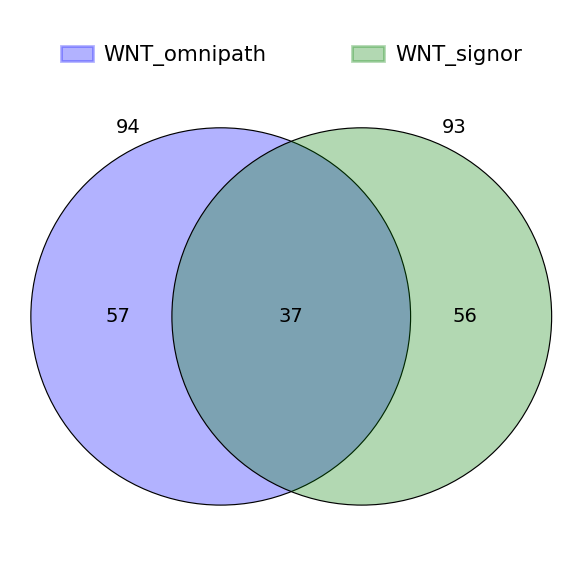

In [33]:
sets = {
    'WNT_omnipath': set(set1),
    'WNT_signor': set(set2),
}

venny4py(sets=sets, out='.', name="wnt_signor_omnipath")

# Comparison with full dataset 

### In this part I will compare the nodes retrieved by signor and omnipath with the genes differentially expressed in the WNT group (see analysis Medulloblastoma part 3)

In [41]:
data_folder = "../data/"

In [56]:
data = pd.read_csv(data_folder + "gene_per_subgroup_correlation.csv", header=[0, 1])

In [53]:
data

Group         WNT                 SHH                  Group3  \
    Attribute        name correlation    name correlation        name   
0           0       AAED1    0.546154  A4GALT    0.676154       ABCB8   
1           1       ABCC8    0.722308   AAED1    0.546154       ABCG4   
2           2       ABCD2    0.750769    AASS    0.640769        ABT1   
3           3       ABHD4    0.527692   ABCB4    0.524615  AC016559.1   
4           4  AC007405.2    0.781538   ABCB9    0.717692  AC026703.1   
..        ...         ...         ...     ...         ...         ...   
855       855      ZNF503    0.502308     NaN         NaN         NaN   
856       856      ZNF576    0.486154     NaN         NaN         NaN   
857       857     ZNF804B    0.676154     NaN         NaN         NaN   
858       858       ZNRF2    0.739231     NaN         NaN         NaN   
859       859       ZNRF3    0.781538     NaN         NaN         NaN   

                  Group4              
    correlation     name correlation  
0      0.574615     AACS    0.740000  
1      0.739231    ABCC8    0.722308  
2      0.560769    ABCC9    0.779231  
3      0.736923  ABHD17C    0.583077  
4      0.889231    ABHD4    0.527692  
..          ...      ...         ...  
855         NaN   UBE2L6    0.775385  
856         NaN    UNC5D    0.938462  
857         NaN     UNCX    0.598462  
858         NaN    USP25    0.552308  
859         NaN    USP32    0.617692  

[860 rows x 9 columns]

In [60]:
set3 = data["WNT"]["name"].dropna().values

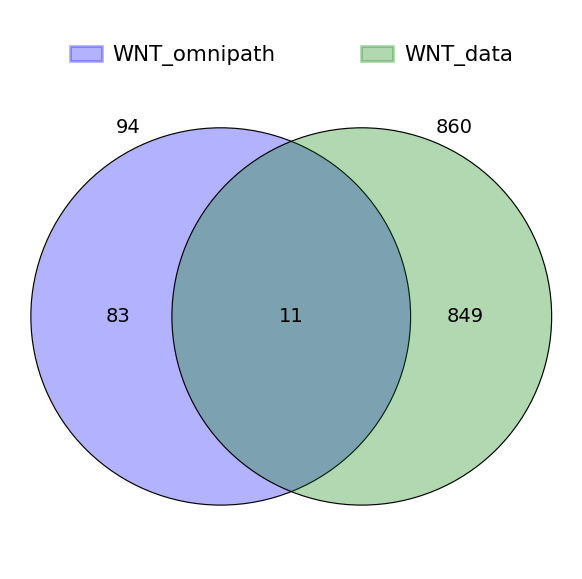

In [57]:
sets = {
    'WNT_omnipath': set(set1),
    'WNT_data': set(set3),
}

venny4py(sets=sets, out='.', name="wnt_data_omnipath")

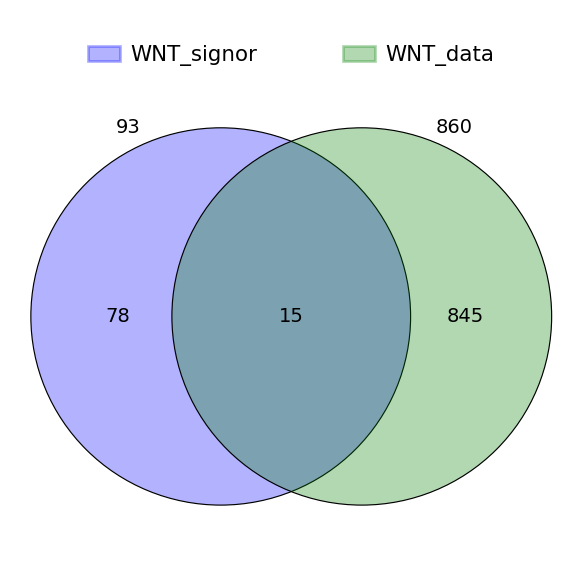

In [58]:
sets = {
    'WNT_signor': set(set2),
    'WNT_data': set(set3),
}

venny4py(sets=sets, out='.', name="wnt_data_signor")